##__NLP Sandbox file__

Goal: Test out code quickly

Author: Amiri Hayes

Last Updated 6/18/2025

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/small_text.csv')
df.head()

Mounted at /content/drive


,text
0,"One day, a little girl named Lily found a need..."
1,"Once upon a time, there was a little car named..."
2,"One day, a little fish named Fin was swimming ..."
3,"Once upon a time, in a land full of trees, the..."
4,"Once upon a time, there was a little girl name..."


In [3]:
# Test Transformers Library
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = "microsoft/xtremedistil-l12-h384-uncased"  # Find popular HuggingFace models here: https://huggingface.co/models
input_text = "The cat sat on the mat"
model = AutoModel.from_pretrained(model_name, output_attentions=True)  # Configure model to return attention values
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

<IPython.core.display.Javascript object>

In [4]:
df['text'][0]

'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt.\n\nLily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."\n\nTogether, they shared the needle and sewed the button on Lily\'s shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'

In [5]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

sentences = []
for paragraph in df['text']:
    sentences.extend(sent_tokenize(paragraph))
sentences[35:45]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


["The sun heard Fin's call and shone its warm light on the shore.",
 'The crab started to feel better and not so cold.',
 'He saw Fin and said, "Thank you, little fish, for making me feel fine.',
 "I don't feel like I will freeze now.",
 'Let\'s play together!"',
 'And so, Fin and the crab played and became good friends.',
 'Once upon a time, in a land full of trees, there was a little cherry tree.',
 'The cherry tree was very sad because it did not have any friends.',
 'All the other trees were big and strong, but the cherry tree was small and weak.',
 'The cherry tree was envious of the big trees.']

In [6]:
sentences[:50]

['One day, a little girl named Lily found a needle in her room.',
 'She knew it was difficult to play with it because it was sharp.',
 'Lily wanted to share the needle with her mom, so she could sew a button on her shirt.',
 'Lily went to her mom and said, "Mom, I found this needle.',
 'Can you share it with me and sew my shirt?"',
 'Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt."',
 "Together, they shared the needle and sewed the button on Lily's shirt.",
 'It was not difficult for them because they were sharing and helping each other.',
 'After they finished, Lily thanked her mom for sharing the needle and fixing her shirt.',
 'They both felt happy because they had shared and worked together.',
 'Once upon a time, there was a little car named Beep.',
 'Beep loved to go fast and play in the sun.',
 'Beep was a healthy car because he always had good fuel.',
 'Good fuel made Beep happy and strong.',
 'One day, Beep was driving in the park when he saw a 

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

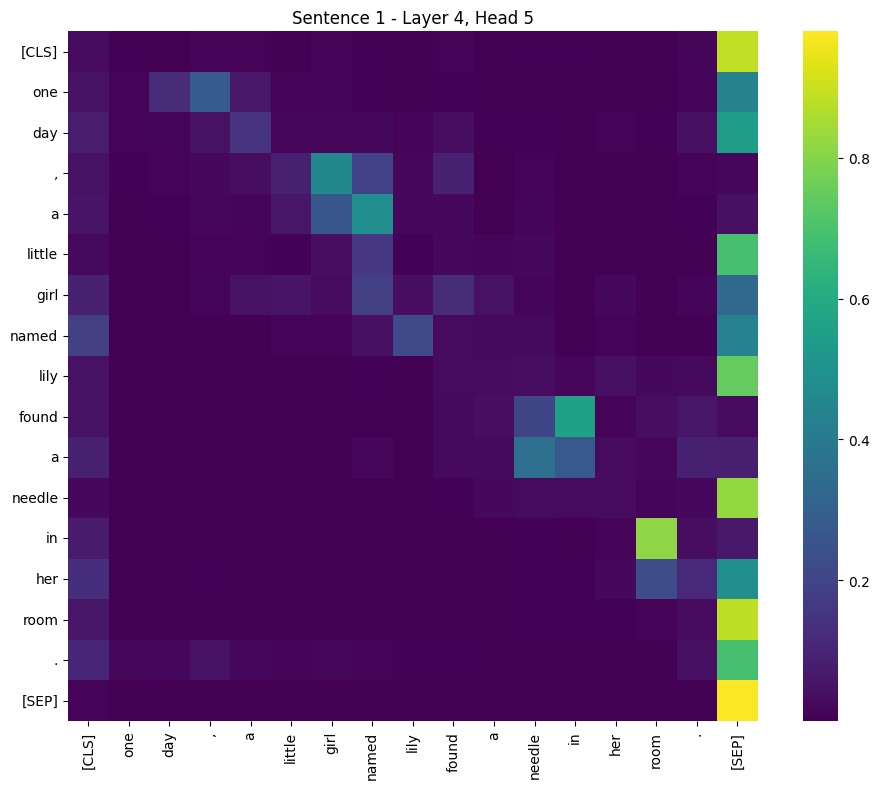

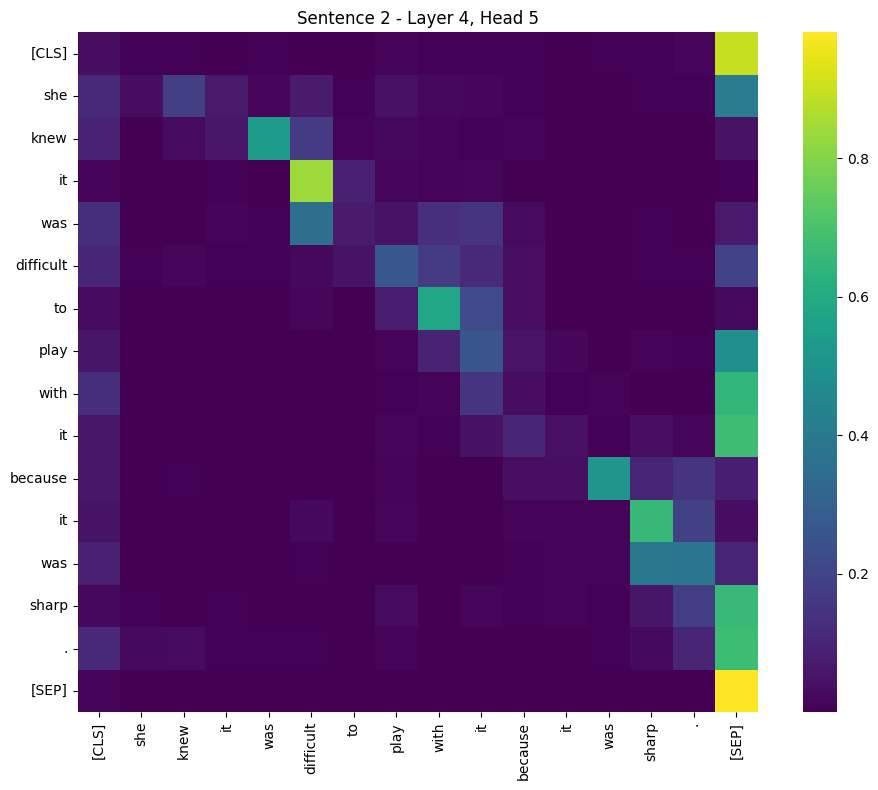

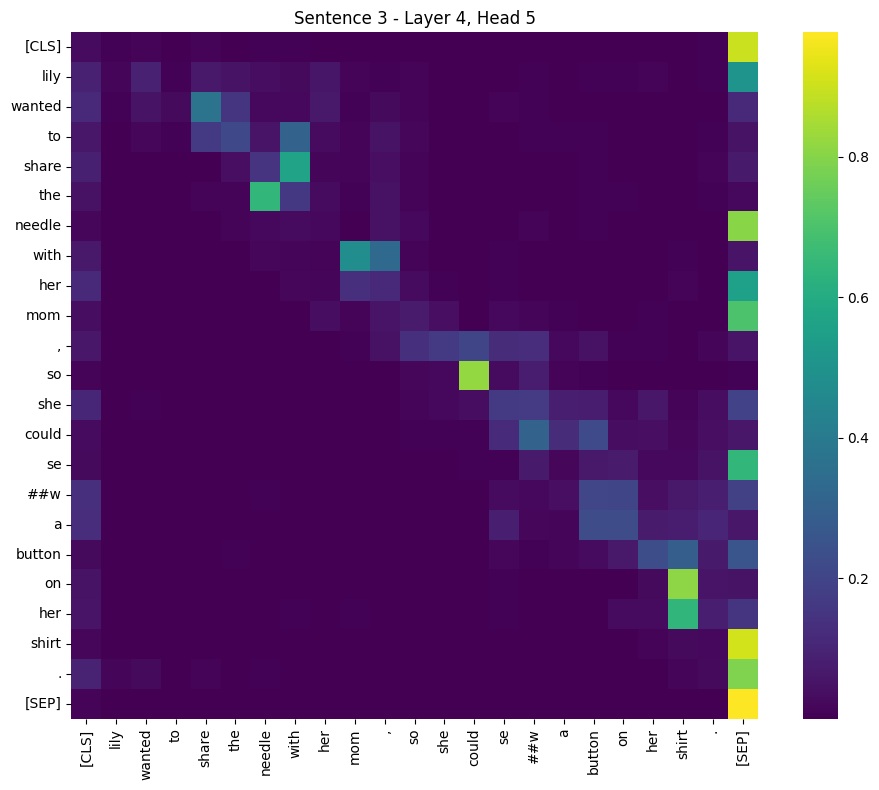

In [7]:
# Individual Head Visualizations

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)
model.eval()

# Choose which head/layer to visualize
target_layer = 4
target_head = 5

# Loop through a few sentences
for i, sentence in enumerate(sentences[:3]):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    attention = outputs.attentions  # Tuple: (num_layers, batch, num_heads, seq_len, seq_len)

    attn_matrix = attention[target_layer][0, target_head].detach()  # shape: [seq_len, seq_len]
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="viridis", square=True, cbar=True)
    plt.title(f"Sentence {i+1} - Layer {target_layer}, Head {target_head}")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)
model.eval()

# Loop through a few sentences
# sentences[32] = "john remembered that he could be happy so he was"
for i, sentence in enumerate(sentences[8:9]):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    attention = outputs.attentions
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    model_view(attention, tokens)

<IPython.core.display.Javascript object>

In [9]:
# Testing for Repeated Words

import re
from collections import Counter

results = []

for i, sentence in enumerate(sentences):
    words = re.findall(r'\b\w+\b', sentence.lower())
    word_counts = Counter(words)

    # Find all words that appear 3 or more times
    repeated_words = [word for word, count in word_counts.items() if count >= 3]

    if repeated_words:
        results.append({
            "index": i,
            "sentence": sentence,
            "repeated_words": repeated_words
        })

results

[{'index': 1,
  'sentence': 'She knew it was difficult to play with it because it was sharp.',
  'repeated_words': ['it']},
 {'index': 34,
  'sentence': 'So, Fin swam to the top of the water and called to the sun, "Please, sun, help my new friend feel fine and not freeze!"',
  'repeated_words': ['the']},
 {'index': 40,
  'sentence': 'And so, Fin and the crab played and became good friends.',
  'repeated_words': ['and']},
 {'index': 41,
  'sentence': 'Once upon a time, in a land full of trees, there was a little cherry tree.',
  'repeated_words': ['a']},
 {'index': 51,
  'sentence': 'All the animals in the land came to eat the cherries and play under the cherry tree.',
  'repeated_words': ['the']},
 {'index': 57,
  'sentence': 'She lived in a big castle with her best friends, a cat and a dog.',
  'repeated_words': ['a']},
 {'index': 64,
  'sentence': 'Lily, the cat, and the dog were happy they could play without the cobweb in the way.',
  'repeated_words': ['the']},
 {'index': 66,
  'se

In [ ]:
from tqdm import tqdm

layer = 3  # Layer index (0-based)
head = 7   # Head index (0-based)

# Stores binary results: 1 if sentence follows next-token pattern, else 0
pattern_flags = []

for sentence in tqdm(sentences):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    attention = outputs.attentions[layer]  # Shape: (batch, heads, seq_len, seq_len)

    attn_matrix = attention[0, head]  # Shape: (seq_len, seq_len)
    seq_len = attn_matrix.shape[0]

    next_token_hits = 0
    valid_tokens = 0

    for i in range(seq_len - 2):  # exclude [CLS] and last token
        valid_tokens += 1
        max_idx = torch.argmax(attn_matrix[i]).item()
        if max_idx == i + 1:
            next_token_hits += 1

    if valid_tokens > 0 and next_token_hits / valid_tokens >= 0.5:
        pattern_flags.append(1)
    else:
        pattern_flags.append(0)

# Calculate final proportion
proportion = sum(pattern_flags) / len(pattern_flags)
print(f" Proportion of sentences where head {head} in layer {layer} attends mostly to next token: {proportion:.3f}")


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm

# Load model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Initialize 12x12 matrix to store T/F values per head
pattern_matrix = [[False for _ in range(12)] for _ in range(12)]

num_layers = 12
num_heads = 12

# Loop over all 144 heads
for layer in range(num_layers):
    for head in tqdm(range(num_heads), desc=f"Layer {layer}"):
        pattern_flags = []

        for sentence in sentences:
            inputs = tokenizer(sentence, return_tensors='pt', truncation=True, max_length=512).to(device)
            with torch.no_grad():
                outputs = model(**inputs)
            attention = outputs.attentions[layer]  # (batch, heads, seq_len, seq_len)

            attn_matrix = attention[0, head]  # (seq_len, seq_len)
            seq_len = attn_matrix.shape[0]

            next_token_hits = 0
            valid_tokens = 0

            for i in range(seq_len - 2):  # skip [CLS] and last token
                valid_tokens += 1
                max_idx = torch.argmax(attn_matrix[i]).item()
                if max_idx == i + 1:
                    next_token_hits += 1

            if valid_tokens > 0 and next_token_hits / valid_tokens >= 0.5:
                pattern_flags.append(1)
            else:
                pattern_flags.append(0)

        # Majority of sentences must match the pattern
        proportion = sum(pattern_flags) / len(pattern_flags)
        pattern_matrix[layer][head] = proportion >= 0.5

        print(f"Layer {layer}, Head {head}: {'T' if pattern_matrix[layer][head] else 'F'}")


In [11]:
pattern_matrix

[[False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False],
 [False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 [False,
  False,
  Fals

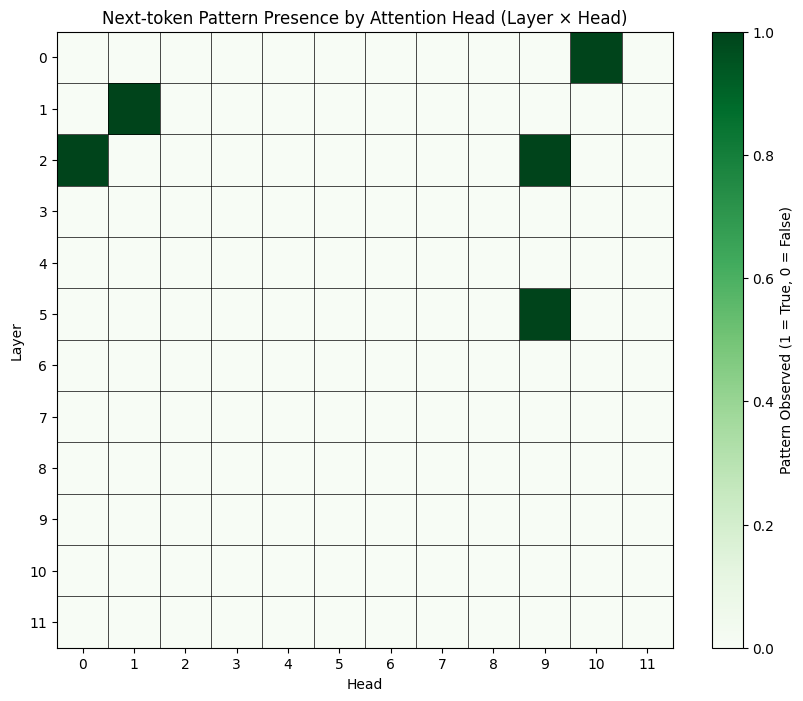

In [10]:
import matplotlib.pyplot as plt
import numpy as np

pattern_matrix = [
    [False, False, False, False, False, False, False, False, False, False, True, False],
    [False, True, False, False, False, False, False, False, False, False, False, False],
    [True, False, False, False, False, False, False, False, False, True, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, True, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
    [False, False, False, False, False, False, False, False, False, False, False, False],
]

pattern_array = np.array(pattern_matrix, dtype=int)

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(pattern_array, cmap='Greens', aspect='equal')

# Draw grid lines at integer positions
for i in range(13):  # 0 to 12 (12 lines for 12 cells)
    ax.axhline(i - 0.5, color='black', linewidth=0.5)
    ax.axvline(i - 0.5, color='black', linewidth=0.5)

# Set ticks in the center of each cell
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(np.arange(12))
ax.set_yticklabels(np.arange(12))

# Axis labels
ax.set_xlabel("Head")
ax.set_ylabel("Layer")
ax.set_title("Next-token Pattern Presence by Attention Head (Layer × Head)")

# Add colorbar
fig.colorbar(cax, label='Pattern Observed (1 = True, 0 = False)')

plt.show()
